In [1]:
required_packages <- c("plgp", "lhs", "mvtnorm")
install.packages(setdiff(required_packages, rownames(installed.packages())))

In [2]:
library(plgp)
library(lhs)
library(mvtnorm)

Loading required package: mvtnorm

Loading required package: tgp



## 5.1 Gaussian process prior

In [3]:
eps <- sqrt(.Machine$double.eps) 

In [4]:
n <- 100
X <- matrix(seq(0, 10, length=n), ncol=1)

In [5]:
D <- distance(X)
Sigma <- exp(-D) + diag(eps, n) 

In [6]:
Y <- rmvnorm(1, sigma=Sigma)

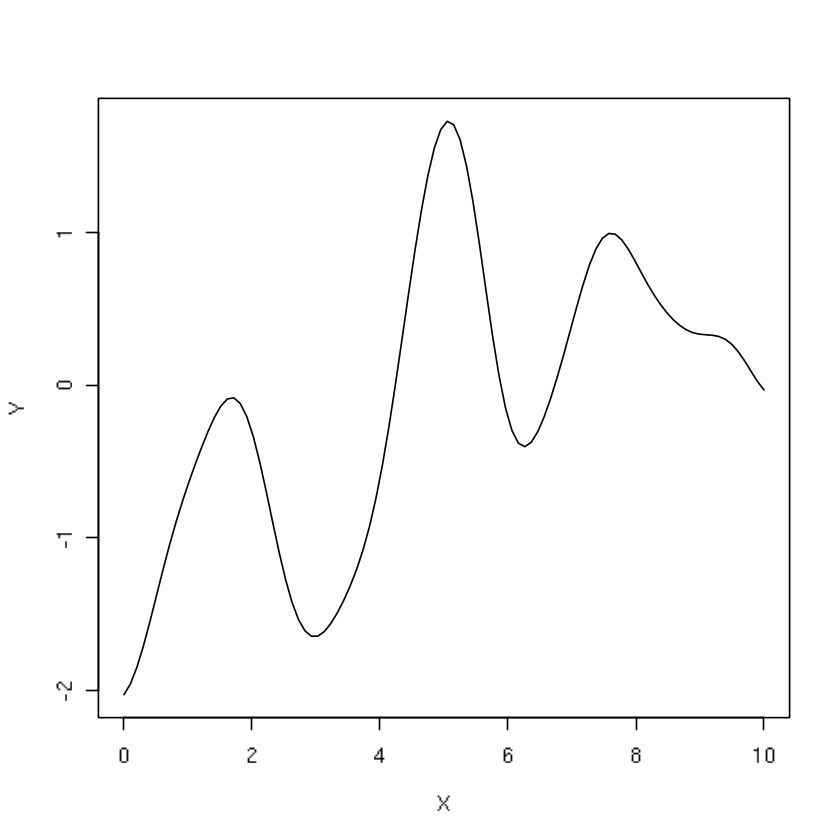

In [7]:
plot(X, Y, type="l")

In [8]:
c(exp(-1^2), exp(-4^2))

[1] 3.678794e-01 1.125352e-07

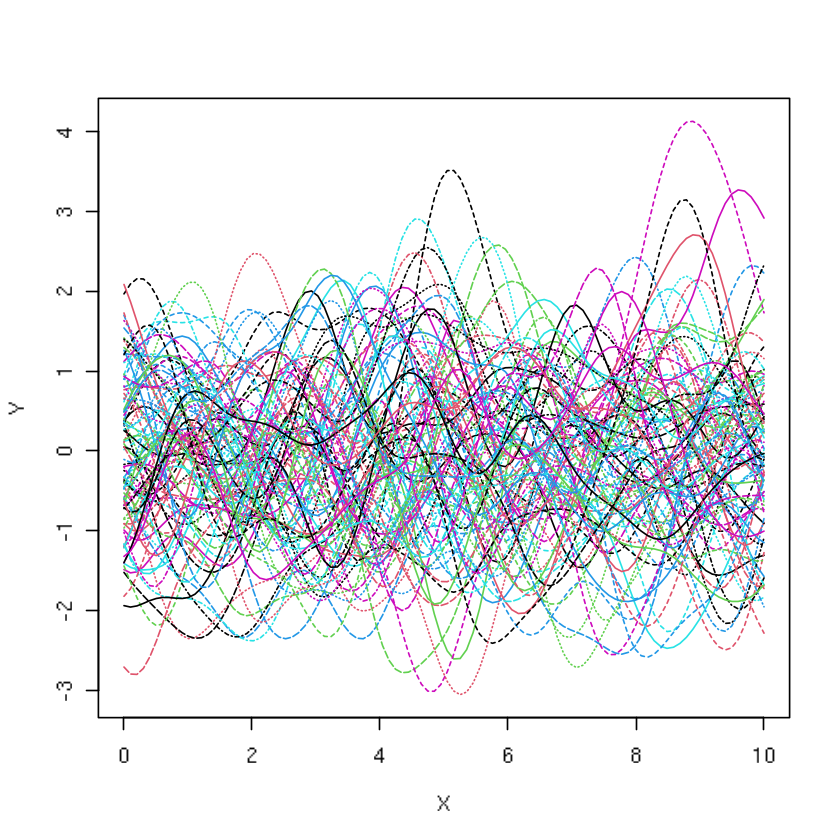

In [9]:
Y <- rmvnorm(100, sigma=Sigma)
matplot(X, t(Y), type="l", ylab="Y")

In [10]:
n <- 8
X <- matrix(seq(0, 2*pi, length=n), ncol=1)
y <- sin(X)
D <- distance(X) 
Sigma <- exp(-D) + diag(eps, ncol(D))

In [11]:
XX <- matrix(seq(-5.5, 2*pi + 5.5, length=100), ncol=1)
DXX <- distance(XX)
SXX <- exp(-DXX) + diag(eps, ncol(DXX))

In [12]:
DX <- distance(XX, X)
SX <- exp(-DX) 

In [13]:
Si <- solve(Sigma)
mup <- SX %*% Si %*% y
Sigmap <- SXX - SX %*% Si %*% t(SX)

In [14]:
YY <- rmvnorm(100, mup, Sigmap)

In [15]:
q1 <- mup + qnorm(0.05, 0, sqrt(diag(Sigmap)))
q2 <- mup + qnorm(0.95, 0, sqrt(diag(Sigmap)))

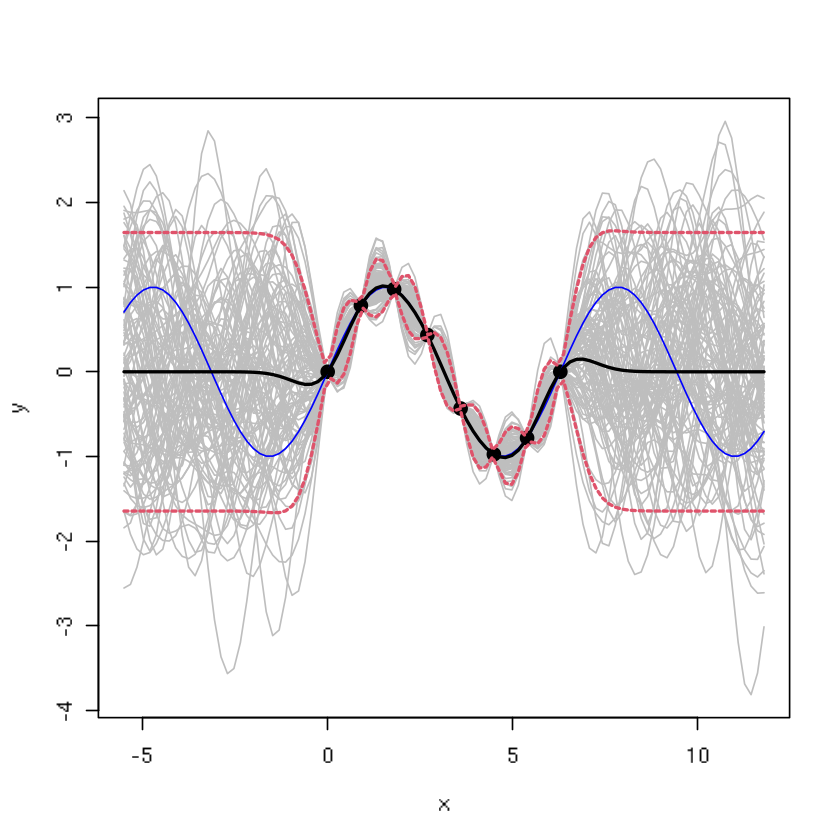

In [16]:
matplot(XX, t(YY), type="l", col="gray", lty=1, xlab="x", ylab="y")
points(X, y, pch=20, cex=2)
lines(XX, sin(XX), col="blue")
lines(XX, mup, lwd=2)
lines(XX, q1, lwd=2, lty=2, col=2)
lines(XX, q2, lwd=2, lty=2, col=2)

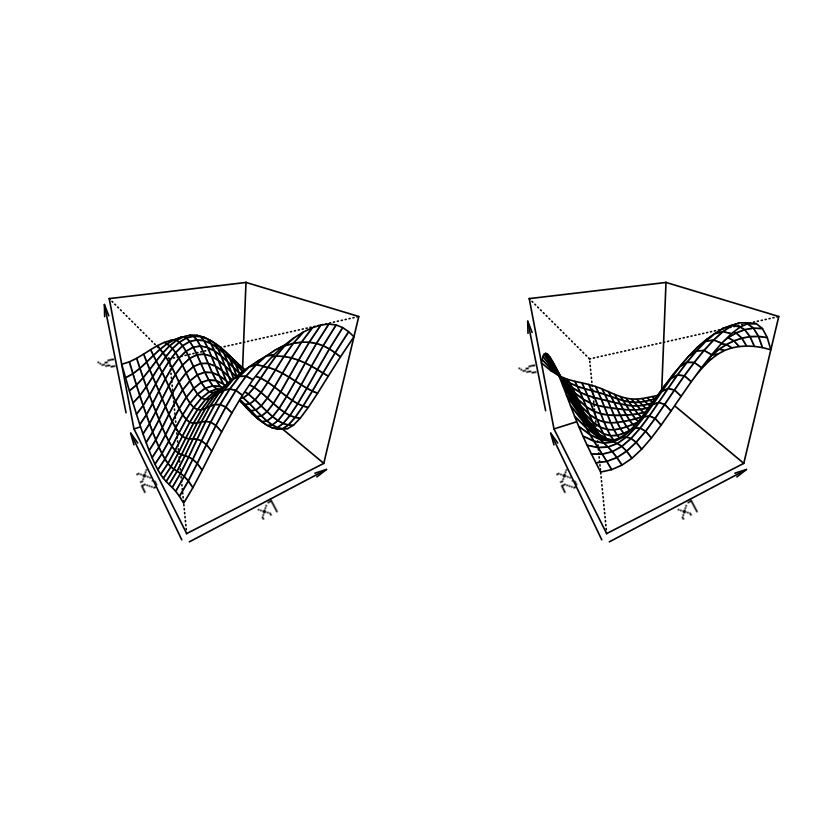

In [17]:
nx <- 20
x <- seq(0, 2, length=nx)
X <- expand.grid(x, x)
D <- distance(X)
Sigma <- exp(-D) + diag(eps, nrow(X))
Y <- rmvnorm(2, sigma=Sigma)
par(mfrow=c(1,2), pty="s") 
persp(x, x, matrix(Y[1,], ncol=nx), theta=-30, phi=30, xlab="x1", 
  ylab="x2", zlab="y")
persp(x, x, matrix(Y[2,], ncol=nx), theta=-30, phi=30, xlab="x1", 
  ylab="x2", zlab="y")

In [18]:
X <- randomLHS(40, 2)
X[,1] <- (X[,1] - 0.5)*6 + 1
X[,2] <- (X[,2] - 0.5)*6 + 1
y <- X[,1]*exp(-X[,1]^2 - X[,2]^2)

In [19]:
xx <- seq(-2, 4, length=40)
XX <- expand.grid(xx, xx)

In [20]:
D <- distance(X)
Sigma <- exp(-D)

In [21]:
DXX <- distance(XX)
SXX <- exp(-DXX) + diag(eps, ncol(DXX))
DX <- distance(XX, X)
SX <- exp(-DX)

In [22]:
Si <- solve(Sigma)
mup <- SX %*% Si %*% y
Sigmap <- SXX - SX %*% Si %*% t(SX)

In [23]:
sdp <- sqrt(diag(Sigmap))

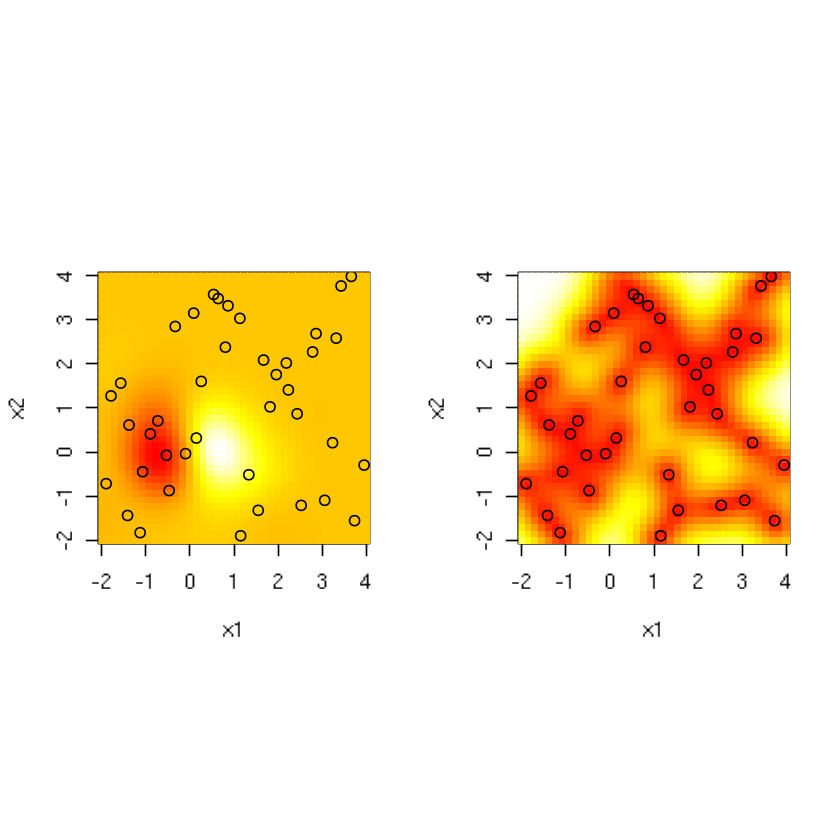

In [24]:
par(pty="s")
par(mfrow=c(1,2))
cols <- heat.colors(128)
image(xx, xx, matrix(mup, ncol=length(xx)), xlab="x1", ylab="x2", col=cols)
points(X[,1], X[,2])
image(xx, xx, matrix(sdp, ncol=length(xx)), xlab="x1", ylab="x2", col=cols)
points(X[,1], X[,2])

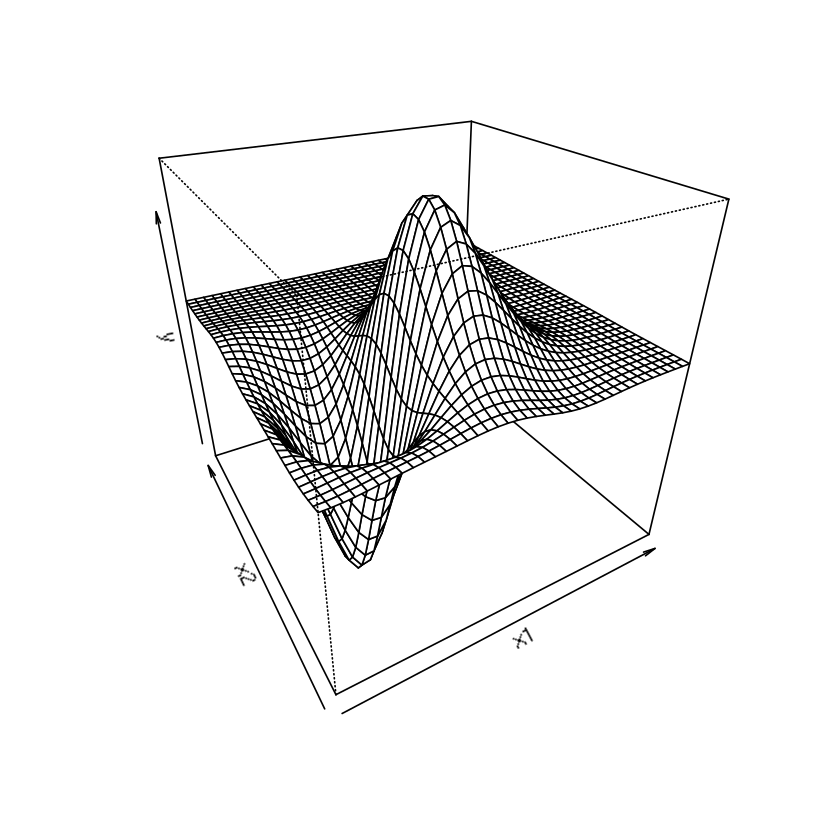

In [25]:
persp(xx, xx, matrix(mup, ncol=40), theta=-30, phi=30, xlab="x1", 
  ylab="x2", zlab="y")

## 5.2 hyperparameters

In [26]:
n <- 100
X <- matrix(seq(0, 10, length=n), ncol=1)
D <- distance(X)

In [27]:
C <- exp(-D) + diag(eps, n) 
tau2 <- 25
Y <- rmvnorm(100, sigma=tau2*C)

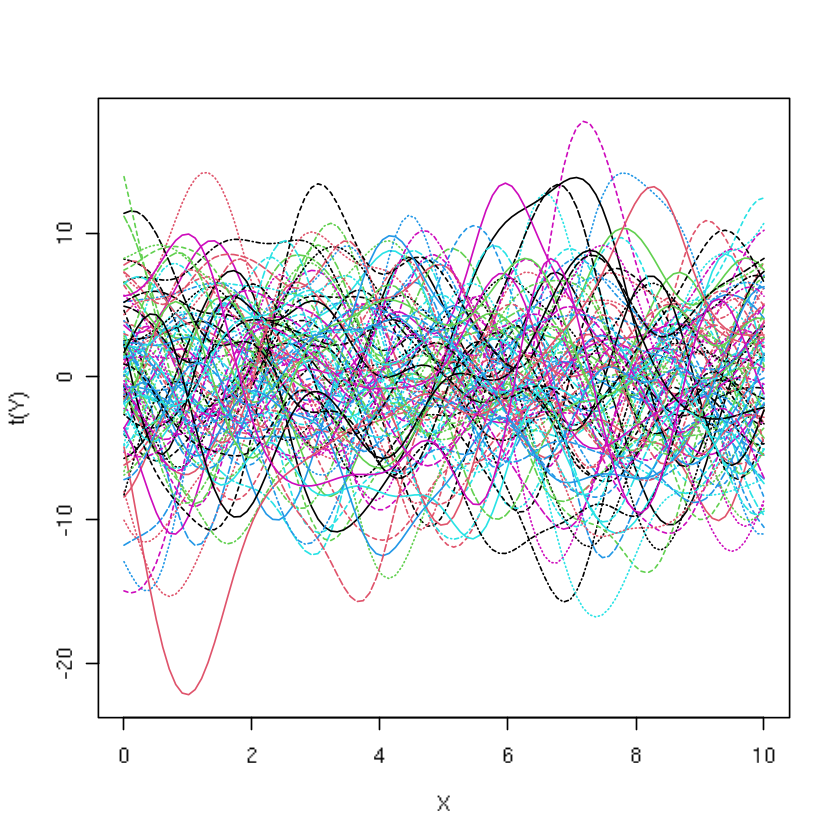

In [28]:
matplot(X, t(Y), type="l")

In [29]:
n <- 8
X <- matrix(seq(0, 2*pi, length=n), ncol=1)
y <- 5*sin(X)

In [30]:
D <- distance(X)
Sigma <- exp(-D)
XX <- matrix(seq(-5.5, 2*pi + 5.5, length=100), ncol=1)
DXX <- distance(XX)
SXX <- exp(-DXX) + diag(eps, ncol(DXX))
DX <- distance(XX, X)
SX <- exp(-DX)
Si <- solve(Sigma); 
mup <- SX %*% Si %*% y
Sigmap <- SXX - SX %*% Si %*% t(SX)

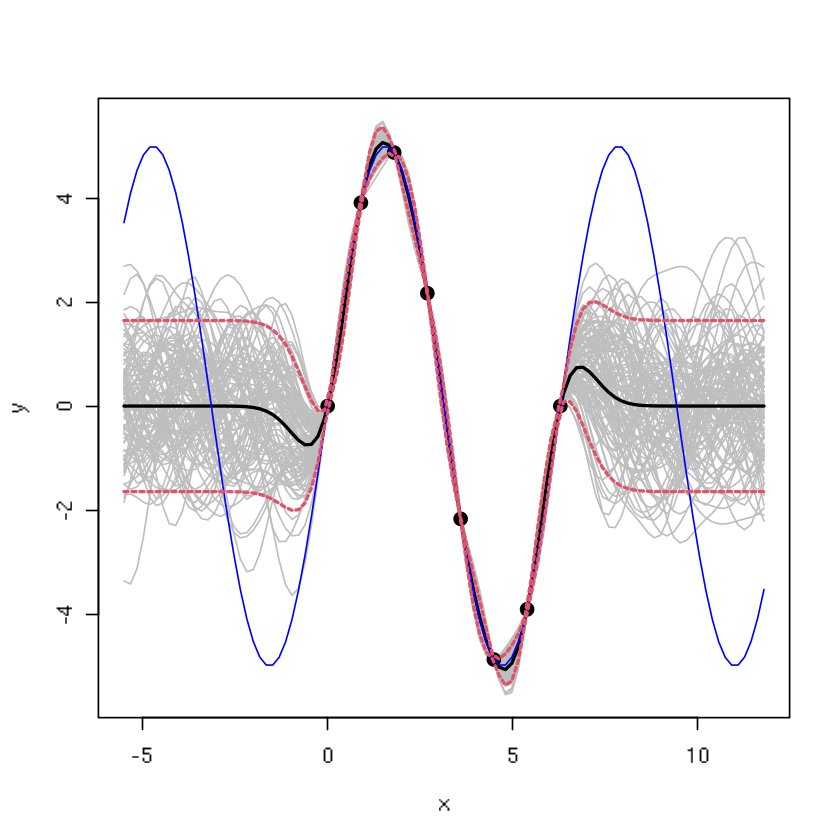

In [31]:
YY <- rmvnorm(100, mup, Sigmap)
q1 <- mup + qnorm(0.05, 0, sqrt(diag(Sigmap)))
q2 <- mup + qnorm(0.95, 0, sqrt(diag(Sigmap)))
matplot(XX, t(YY), type="l", col="gray", lty=1, xlab="x", ylab="y")
points(X, y, pch=20, cex=2)
lines(XX, mup, lwd=2)
lines(XX, 5*sin(XX), col="blue")
lines(XX, q1, lwd=2, lty=2, col=2)
lines(XX, q2, lwd=2, lty=2, col=2)

In [32]:
CX <- SX
Ci <- Si
CXX <- SXX
tau2hat <- drop(t(y) %*% Ci %*% y / length(y))

In [33]:
2*sqrt(tau2hat)

[1] 5.486648

In [34]:
mup2 <- CX %*% Ci %*% y
Sigmap2 <- tau2hat*(CXX - CX %*% Ci %*% t(CX))
YY <- rmvnorm(100, mup2, Sigmap2)
q1 <- mup + qnorm(0.05, 0, sqrt(diag(Sigmap2)))
q2 <- mup + qnorm(0.95, 0, sqrt(diag(Sigmap2)))

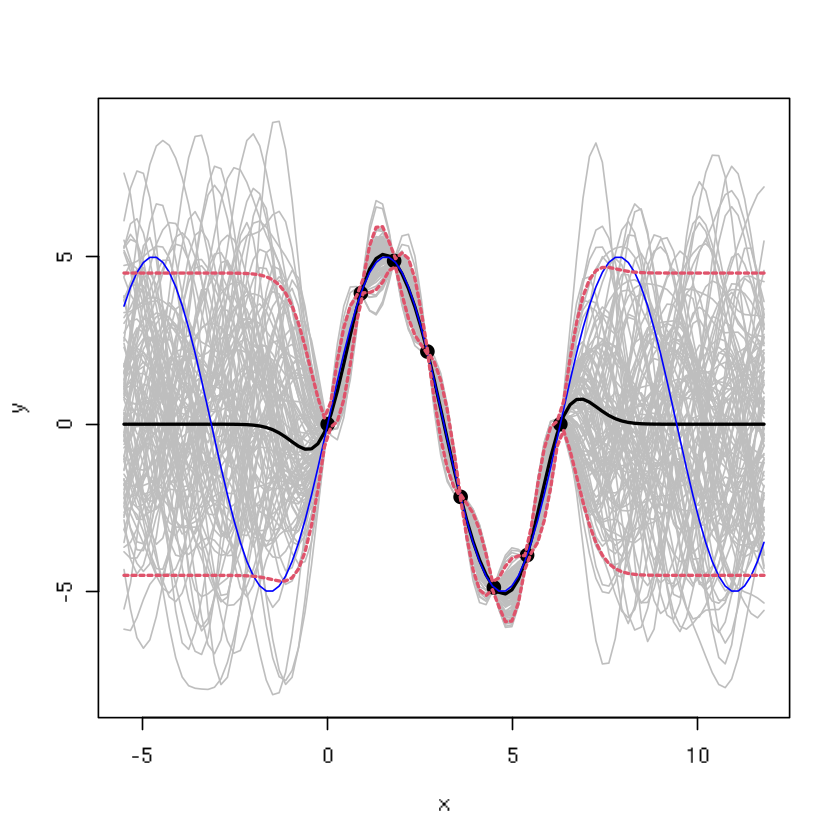

In [35]:
matplot(XX, t(YY), type="l", col="gray", lty=1, xlab="x", ylab="y")
points(X, y, pch=20, cex=2)
lines(XX, mup, lwd=2)
lines(XX, 5*sin(XX), col="blue")
lines(XX, q1, lwd=2, lty=2, col=2); lines(XX, q2, lwd=2, lty=2, col=2)

In [36]:
score <- function(Y, mu, Sigma, mah=FALSE) {
  Ymmu <- Y - mu
  Sigmai <- solve(Sigma)
  mahdist <- t(Ymmu) %*% Sigmai %*% Ymmu
  if (mah) return(sqrt(mahdist))
  return (- determinant(Sigma, logarithm=TRUE)$modulus - mahdist)
}

In [37]:
Ytrue <- 5*sin(XX)
df <- data.frame(score(Ytrue, mup, Sigmap, mah=TRUE),
                 score(Ytrue, mup2, Sigmap2, mah=TRUE))
colnames(df) <- c("tau2=1", "tau2hat")
df

tau2=1,tau2hat
<dbl>,<dbl>
10.63097,3.875215


In [38]:
Ytrue <- 5*sin(XX)
df <- data.frame(score(Ytrue, mup, Sigmap, mah=FALSE),
                 score(Ytrue, mup2, Sigmap2, mah=FALSE))
colnames(df) <- c("tau2=1", "tau2hat")
df

tau2=1,tau2hat
<dbl>,<dbl>
1118.029,1014.195


In [39]:
nlg <- function(g, D, Y) {
  n <- length(Y)
  K <- exp(-D) + diag(g, n)
  Ki <- solve(K)
  ldetK <- determinant(K, logarithm=TRUE)$modulus
  ll <- - (n/2)*log(t(Y) %*% Ki %*% Y) - (1/2)*ldetK
  counter <<- counter + 1
  return(-ll)
}

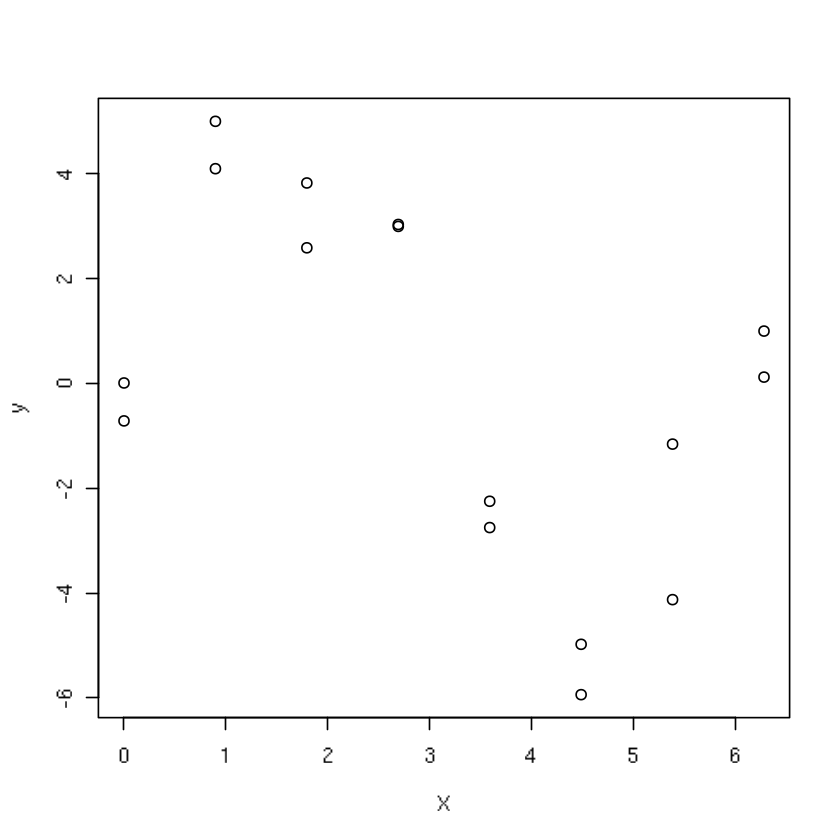

In [40]:
n = 8
X <- matrix(seq(0, 2*pi, length=n), ncol=1)
X <- rbind(X, X)
n <- nrow(X)
y <- 5*sin(X) + rnorm(n, sd=1)
plot(X, y)

In [41]:
D <- distance(X)

In [42]:
counter <- 0
g <- optimize(nlg, interval=c(eps, var(y)), D=D, Y=y)$minimum
g

[1] 0.09753217

In [43]:
counter

[1] 19

In [44]:
K <- exp(-D) + diag(g, n)
Ki <- solve(K)
tau2hat <- drop(t(y) %*% Ki %*% y / n)
c(tau=sqrt(tau2hat), sigma=sqrt(tau2hat*g))

tau    sigma 
2.937685 0.917443

In [45]:
XX <- matrix(seq(-5.5, 2*pi + 5.5, length=100), ncol=1)
DXX <- distance(XX)

In [46]:
DX <- distance(XX, X)
KX <- exp(-DX)
KXX <- exp(-DXX) + diag(g, nrow(DXX))

In [47]:
mup <- KX %*% Ki %*% y
Sigmap <- tau2hat*(KXX - KX %*% Ki %*% t(KX))
q1 <- mup + qnorm(0.05, 0, sqrt(diag(Sigmap)))
q2 <- mup + qnorm(0.95, 0, sqrt(diag(Sigmap)))

In [48]:
Sigma.int <- tau2hat*(exp(-DXX) + diag(eps, nrow(DXX)) 
  - KX %*% Ki %*% t(KX))
YY <- rmvnorm(100, mup, Sigma.int)

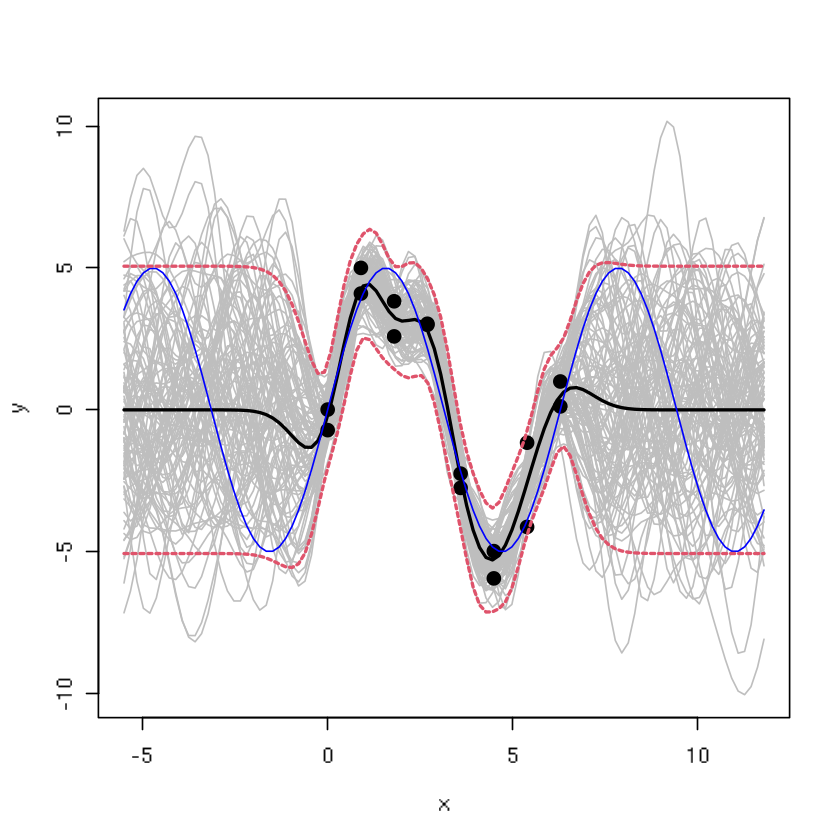

In [49]:
matplot(XX, t(YY), type="l", lty=1, col="gray", xlab="x", ylab="y")
points(X, y, pch=20, cex=2)
lines(XX, mup, lwd=2)
lines(XX, 5*sin(XX), col="blue")
lines(XX, q1, lwd=2, lty=2, col=2)
lines(XX, q2, lwd=2, lty=2, col=2)

In [50]:
nlg.count <- counter
nlg.count

[1] 19

In [51]:
gnlg <- function(g, D, Y) {
  n <- length(Y)
  K <- exp(-D) + diag(g, n)
  Ki <- solve(K)
  KiY <- Ki %*% Y
  dll <- (n/2) * t(KiY) %*% KiY / (t(Y) %*% KiY) - (1/2)*sum(diag(Ki))
  return(-dll)
}

In [52]:
counter <- 0
out <- optim(0.1*var(y), nlg, gnlg, method="L-BFGS-B", lower=eps, upper=var(y), D=D, Y=y)
c(g, out$par)

[1] 0.09753217 0.09752452

In [53]:
c(out$counts, actual=counter)

function gradient   actual 
      13       13       13